<a href="https://colab.research.google.com/github/taavip/MAPlaneeringud/blob/main/plan_analyys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+https://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (1,823 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../python3-numpy_

In [2]:
pip install owslib

     |████████████████████████████████| 216 kB 5.4 MB/s 


In [3]:
import pandas as pd
import numpy as np
import re
import sklearn
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "https://gsavalik.envir.ee/geoserver/planeeringud/ows?service=WFS"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# -----------------

# Fetch the last available layer (as an example) --> 'vaestoruutu:vaki2017_5km'
layers = list(wfs.contents)
layer = layers[3]

# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.1.0", request='GetFeature',
      typeName=layer, outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
data = gpd.read_file(q)

In [4]:
layers

['planeeringud:detail_plan_juurdep',
 'planeeringud:detail_plan_sund',
 'planeeringud:detail_plan_avalik',
 'planeeringud:detail_plan_ala',
 'planeeringud:detail_plan_haljastus',
 'planeeringud:detail_plan_hoonestus',
 'planeeringud:detail_plan_kktingimus',
 'planeeringud:detail_plan_krunt',
 'planeeringud:detail_plan_kuja',
 'planeeringud:detail_plan_maapar',
 'planeeringud:detail_plan_rajatis',
 'planeeringud:detail_plan_servituut',
 'planeeringud:detail_plan_transp',
 'planeeringud:detail_plan_tehno',
 'planeeringud:detail_plan_tingimus',
 'planeeringud:detail_plan_valveplaan',
 'planeeringud:detail_plan_valveplaan_osa',
 'planeeringud:ehak_tiheasustus',
 'planeeringud:rb_planeeringutrass',
 'planeeringud:yld_plan_ala',
 'planeeringud:yld_plan_juurdep',
 'planeeringud:detail_plan_koko',
 'planeeringud:yld_plan_jaade',
 'planeeringud:yld_plan_kktingimus',
 'planeeringud:yld_plan_maakas',
 'planeeringud:yld_plan_vaartmiljoo',
 'planeeringud:yld_plan_ala_osa',
 'planeeringud:maaamet__r

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a216452d0>,
      dtype=object)

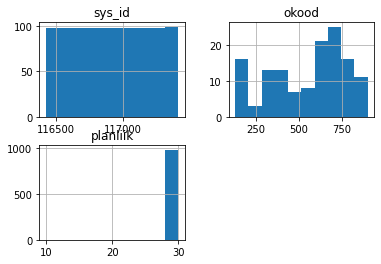

In [5]:
data.hist()


In [6]:
data["vastuvkp"] = data["vastuvkp"].astype("datetime64")

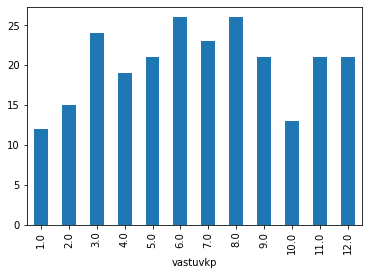

In [7]:
data["vastuvkp"].groupby(data["vastuvkp"].dt.month).count().plot(kind="bar")

In [8]:
#data["algatkp"].dt.year.value_counts() #.plot(kind="bar")

In [9]:
data

,id,sys_id,planid,dp_kiht,oid,okood,plannim,planliik,planliik_vaste,planeesm,planseis,planseis_vaste,algatkp,vastuvkp,kehtestkp,planksh,planviide,muutkp,muutnr,seos_ma,arhiiv_digi,avalik,plan_kihid,yp_muutev,allikas,stamp_upd,geometry
0,detail_plan_ala.0,116429,90412,DP_plan_ala,1,714.0,Laratsi II detailplaneering,30,Detailplaneering,Detailplaneeringu eesmärgiks on ehitusõiguse m...,10,Planeering on kehtiv,2019-06-28,2020-09-08,2021-01-26,None,https://gis.saaremaavald.ee/failid/DP/DP-19-002/,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((396038.110 6486828.740, 396335.080 6..."
1,detail_plan_ala.1,116430,88092,DP_plan_ala,18,353.0,"Andineeme külas, Tülivere ühistu 26 ja Tüliver...",10,Maakonnaplaneering; sh osa hõlmav ja teemaplan...,Kahe elamu krundi moodustamine. Maatükid kokku...,10,Planeering on kehtiv,2020-07-02,2020-12-31,2021-02-25,None,https://xgis.maaamet.ee/xgis2/page/app/maainfo,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((582116.026 6595820.950, 582100.958 6..."
2,detail_plan_ala.2,116431,92752,DP_plan_ala,3,198.0,Ilmandu külas Tarna tee 1 maaüksuse ja lähiala...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on sel...,10,Planeering on kehtiv,2016-12-15,2020-05-28,2021-02-16,None,https://harku.maps.arcgis.com/apps/webappviewe...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((527095.582 6588911.951, 527021.498 6..."
3,detail_plan_ala.3,116432,80372,DP_plan_ala,1,NaN,Meierei tn 36 kinnistu ja lähiala detailplanee...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on kin...,10,Planeering on kehtiv,2019-02-11,2021-02-22,2021-05-24,None,http://atp.amphora.ee/raasikuvv/index.aspx?itm...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((567673.829 6581797.095, 567584.551 6..."
4,detail_plan_ala.4,116433,95092,DP_plan_ala,7,NaN,Matise detailplaneering,30,Detailplaneering,Elamukruntidele ehitusõiguse määramine ehitusk...,10,Planeering on kehtiv,2020-02-28,2021-02-26,2021-08-27,None,https://www.saaremaavald.ee/detailplaneeringud...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,jah,MA sisestatud,2021-12-10,"POLYGON ((377561.276 6465387.797, 377559.189 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,detail_plan_ala.976,117405,102036,DP_plan_ala,28,NaN,"Kinnistute Sepamäe tee 13, Sepamäe tee 15 ja S...",30,Detailplaneering,Kinnistute jagamine ning ehitusõiguse määramin...,10,Planeering on kehtiv,2020-09-16,2021-06-30,2021-12-15,None,None,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2022-01-10,"POLYGON ((549230.630 6601399.070, 549289.730 6..."
977,detail_plan_ala.977,117406,101172,DP_plan_ala,10,NaN,Kõrgemaa kinnistu detailplaneering,30,Detailplaneering,Kinnistu jagamine loodusliku maa ja elamumaa k...,10,Planeering on kehtiv,2020-05-27,2021-03-24,2021-10-20,None,None,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2022-01-11,"POLYGON ((547669.350 6597654.390, 547742.660 6..."
978,detail_plan_ala.978,117407,92034,DP_plan_ala,11,NaN,Kinnistu Tammenurme tee 5 detailplaneering,30,Detailplaneering,Ehitusõiguse määramine kaksikelamule,10,Planeering on kehtiv,2020-11-18,2021-04-14,2021-10-20,None,None,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2022-01-11,"POLYGON ((551381.580 6598253.250, 551430.6

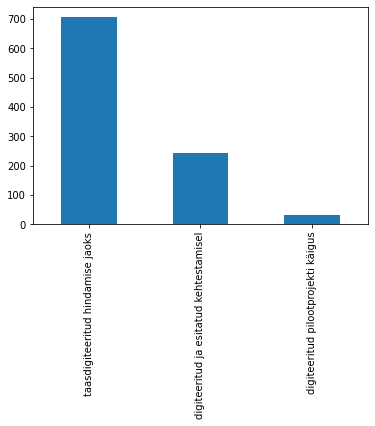

In [10]:
data["plan_kihid"].value_counts()[:10].plot(kind='bar')

In [11]:
#pd.unique(data["vastuvkp"])

In [12]:
data['area']=data.geometry.area

In [13]:

data.algatkp =  pd.to_datetime(data.algatkp, format='%Y-%m-%d')
data.vastuvkp =  pd.to_datetime(data.vastuvkp, format='%Y-%m-%d')
data.kehtestkp =  pd.to_datetime(data.kehtestkp, format='%Y-%m-%d')

data['alg_keh'] = (data.kehtestkp-data.algatkp).astype('timedelta64[D]')
data['vas_keh'] = (data.kehtestkp-data.vastuvkp).astype('timedelta64[D]')
data['alg_vas'] = (data.vastuvkp-data.algatkp).astype('timedelta64[D]')

data.planksh= data.planksh.str.lower()
data.yp_muutev= data.yp_muutev.str.lower()

data.yp_muutev = data.yp_muutev.replace({'1': 'jah'})

In [14]:
#data.alg_keh.astype('timedelta64[D]').astype('int')

ValueError: ignored

In [15]:
#categorical data
categorical_cols = ['planksh','yp_muutev']

#import pandas as pd
df = pd.get_dummies(data, columns = categorical_cols)

In [16]:
df

,id,sys_id,planid,dp_kiht,oid,okood,plannim,planliik,planliik_vaste,planeesm,planseis,planseis_vaste,algatkp,vastuvkp,kehtestkp,planviide,muutkp,muutnr,seos_ma,arhiiv_digi,avalik,plan_kihid,allikas,stamp_upd,geometry,area,alg_keh,vas_keh,alg_vas,planksh_,planksh_ei,planksh_jah,yp_muutev_ei,yp_muutev_jah
0,detail_plan_ala.0,116429,90412,DP_plan_ala,1,714.0,Laratsi II detailplaneering,30,Detailplaneering,Detailplaneeringu eesmärgiks on ehitusõiguse m...,10,Planeering on kehtiv,2019-06-28,2020-09-08,2021-01-26,https://gis.saaremaavald.ee/failid/DP/DP-19-002/,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,MA sisestatud,2021-12-10,"POLYGON ((396038.110 6486828.740, 396335.080 6...",77103.657000,578.0,140.0,438.0,0,0,0,0,0
1,detail_plan_ala.1,116430,88092,DP_plan_ala,18,353.0,"Andineeme külas, Tülivere ühistu 26 ja Tüliver...",10,Maakonnaplaneering; sh osa hõlmav ja teemaplan...,Kahe elamu krundi moodustamine. Maatükid kokku...,10,Planeering on kehtiv,2020-07-02,2020-12-31,2021-02-25,https://xgis.maaamet.ee/xgis2/page/app/maainfo,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,MA sisestatud,2021-12-10,"POLYGON ((582116.026 6595820.950, 582100.958 6...",3184.967490,238.0,56.0,182.0,0,0,0,0,0
2,detail_plan_ala.2,116431,92752,DP_plan_ala,3,198.0,Ilmandu külas Tarna tee 1 maaüksuse ja lähiala...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on sel...,10,Planeering on kehtiv,2016-12-15,2020-05-28,2021-02-16,https://harku.maps.arcgis.com/apps/webappviewe...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,MA sisestatud,2021-12-10,"POLYGON ((527095.582 6588911.951, 527021.498 6...",27264.116427,1524.0,264.0,1260.0,0,0,0,0,0
3,detail_plan_ala.3,116432,80372,DP_plan_ala,1,NaN,Meierei tn 36 kinnistu ja lähiala detailplanee...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on kin...,10,Planeering on kehtiv,2019-02-11,2021-02-22,2021-05-24,http://atp.amphora.ee/raasikuvv/index.aspx?itm...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,MA sisestatud,2021-12-10,"POLYGON ((567673.829 6581797.095, 567584.551 6...",16442.520075,833.0,91.0,742.0,0,0,0,0,0
4,detail_plan_ala.4,116433,95092,DP_plan_ala,7,NaN,Matise detailplaneering,30,Detailplaneering,Elamukruntidele ehitusõiguse määramine ehitusk...,10,Planeering on kehtiv,2020-02-28,2021-02-26,2021-08-27,https://www.saaremaavald.ee/detailplaneeringud...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,MA sisestatud,2021-12-10,"POLYGON ((377561.276 6465387.797, 377559.189 6...",64412.235153,546.0,182.0,364.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,detail_plan_ala.976,117405,102036,DP_plan_ala,28,NaN,"Kinnistute Sepamäe tee 13, Sepamäe tee 15 ja S...",30,Detailplaneering,Kinnistute jagamine ning ehitusõiguse määramin...,10,Planeering on kehtiv,2020-09-16,2021-06-30,2021-12-15,None,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,MA sisestatud,2022-01-10,"POLYGON ((549230.630 6601399.070, 549289.730 6...",6629.156250,455.0,168.0,287.0,0,0,0,0,0
977,detail_plan_ala.977,117406,101172,DP_plan_ala,10,NaN,Kõrgemaa kinnistu detailplaneering,30,Detailplaneering,Kinnistu jagamine loodusliku maa ja elamumaa k...,10,Planeering on kehtiv,2020-05-27,2021-03-24,2021-10-20,None,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,MA sisestatud,2022-01-11,"POLYGON ((547669.350 6597654.390, 547742.660 6...",10290.357050,511.0,210.0,301.0,0,0,0,0,0
978,detail_plan_ala.978,117407,92034,DP_plan_ala,11,NaN,Kinnistu Tammenurme tee 5 detailplaneer

In [18]:
#data[['alg_keh','vas_keh','alg_vas','alg_keh','vas_keh','alg_vas','planksh_','planksh_ei','planksh_jah','yp_muutev_ei','yp_muutev_jah']]

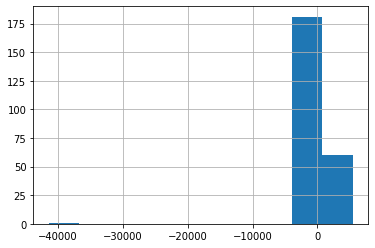

In [19]:
data['alg_vas'].hist()

In [20]:
df[['alg_keh','vas_keh','alg_vas','planksh_','planksh_ei','planksh_jah','yp_muutev_ei','yp_muutev_jah','area']].fillna(0)

,alg_keh,vas_keh,alg_vas,planksh_,planksh_ei,planksh_jah,yp_muutev_ei,yp_muutev_jah,area
0,578.0,140.0,438.0,0,0,0,0,0,77103.657000
1,238.0,56.0,182.0,0,0,0,0,0,3184.967490
2,1524.0,264.0,1260.0,0,0,0,0,0,27264.116427
3,833.0,91.0,742.0,0,0,0,0,0,16442.520075
4,546.0,182.0,364.0,0,0,0,0,1,64412.235153
...,...,...,...,...,...,...,...,...,...
976,455.0,168.0,287.0,0,0,0,0,0,6629.156250
977,511.0,210.0,301.0,0,0,0,0,0,10290.357050
978,336.0,189.0,147.0,0,0,0,0,0,2048.783900
979,1724.0,140.0,1584.0,0,0,0,0,0,154618.388002


(0.0, 6000.0)

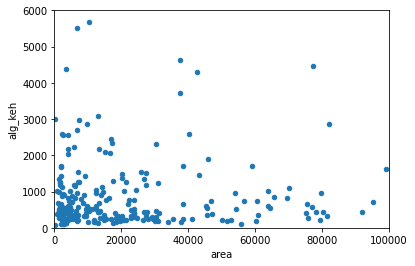

In [22]:
import matplotlib.pyplot as plt
df.plot.scatter('alg','alg_keh')
plt.xlim(0, 100000)
plt.ylim(0, 6000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a2146b450>,
      dtype=object)

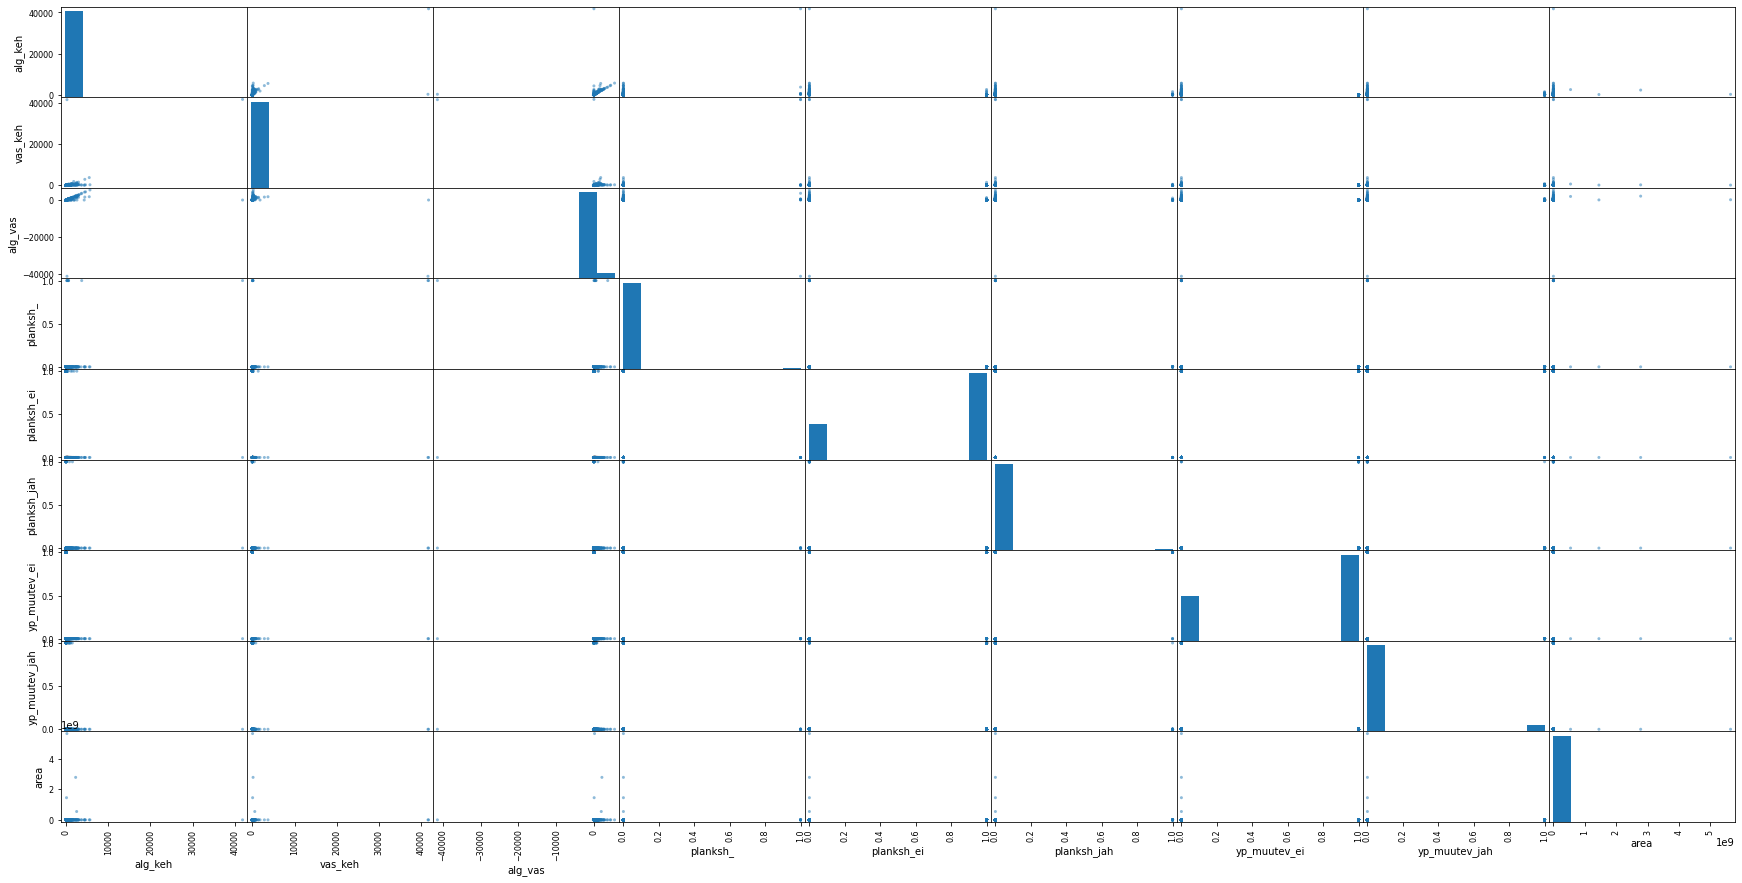

In [23]:
pd.plotting.scatter_matrix(df[['alg_keh','vas_keh','alg_vas','planksh_','planksh_ei','planksh_jah','yp_muutev_ei','yp_muutev_jah','area']].fillna(0),figsize=(30,15))

In [ ]:
.corr

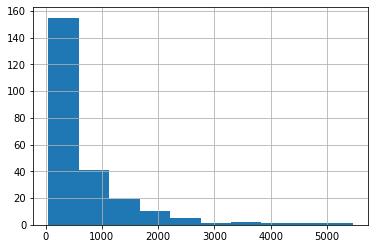

In [138]:
data[data['alg_vas']>0]['alg_vas'].hist()

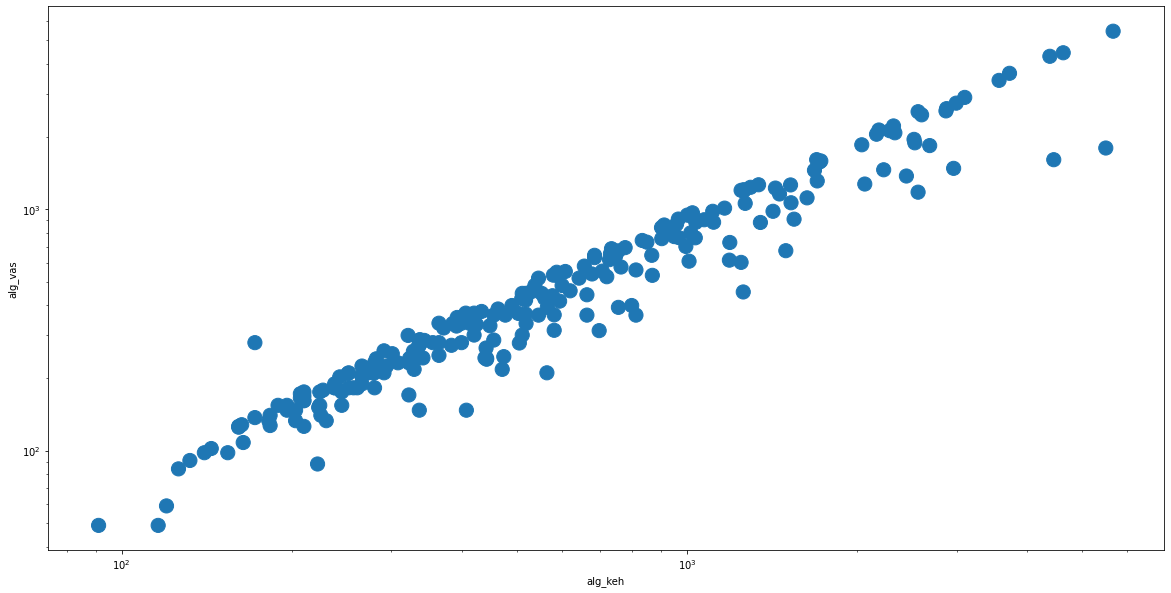

In [168]:
dfp =data[(data['alg_keh']<10000) &(data['alg_vas']>0)&(data['alg_keh']>0)].fillna(0)
dfp.plot.scatter('alg_keh','alg_vas', s=dfp['area'].clip(0,200),figsize=(20,10),loglog=True)

In [ ]:
mkr_dict = {'jah': 'x', 'ei': '+', '': 'o'}
for kind in mkr_dict:
    d = m[m.type==kind]
    plt.scatter(d.meters, d.speed, 
                s = 100* d.weight, 
                c = d.old, 
                marker = mkr_dict[kind])
plt.show()

In [ ]:
data.plot.scatter()

In [24]:
data.alg_vas.value_counts()

182.0     6
364.0     5
336.0     5
154.0     5
280.0     4
         ..
2072.0    1
165.0     1
966.0     1
1848.0    1
438.0     1
Name: alg_vas, Length: 179, dtype: int64

# Krunt

In [25]:
layer = layers[7]

# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.1.0", request='GetFeature',
      typeName=layer, outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
krunt = gpd.read_file(q)

In [26]:
krunt

,id,sys_id,planid,objectid,dp_kiht,oid,okood,otstarve,tingimus,pind,tahis,nimetus,parkimis_arv,allikas,stamp_upd,geometry
0,detail_plan_krunt.0,636477,1182,2,DP_krunt,1,725.0,Maatulundusmaa 65; Elamumaa 35,None,NaN,M65; EE35,None,None,MA sisestatud,2021-11-17,"POLYGON ((524122.900 6561694.600, 524188.250 6..."
1,detail_plan_krunt.1,636478,1182,1,DP_krunt,2,725.0,Maatulundusmaa 65; Elamumaa 35,None,NaN,M65; EE35,None,None,MA sisestatud,2021-11-17,"POLYGON ((524112.940 6561816.240, 524188.250 6..."
2,detail_plan_krunt.2,636479,1180,3,DP_krunt,1,725.0,Elamumaa,None,2629.0,E;,None,None,MA sisestatud,2021-11-17,"POLYGON ((521111.910 6564343.720, 521135.100 6..."
3,detail_plan_krunt.3,636480,1180,12,DP_krunt,5,725.0,Elamumaa,None,1142.0,E;,None,None,MA sisestatud,2021-11-17,"POLYGON ((520995.350 6564304.020, 521016.370 6..."
4,detail_plan_krunt.4,636481,1180,üldmaa,DP_krunt,16,725.0,Üldkasutatav maa,None,10187.0,Ü;,None,None,MA sisestatud,2021-11-17,"POLYGON ((521016.840 6564426.160, 521063.110 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252,detail_plan_krunt.4252,640729,93593,4,DP_krunt,10,890.0,Tee ja tänava maa,None,4211.0,LT,None,None,MA sisestatud,2021-11-17,"POLYGON ((550259.305 6595861.123, 550269.825 6..."
4253,detail_plan_krunt.4253,640730,93593,5,DP_krunt,9,890.0,Tee ja tänava maa,None,3408.0,LT,None,None,MA sisestatud,2021-11-17,"POLYGON ((550148.620 6595938.490, 550159.950 6..."
4254,detail_plan_krunt.4254,640731,93593,2,DP_krunt,6,890.0,Looduslik maa,None,3261.0,HL,None,None,MA sisestatud,2021-11-17,"POLYGON ((550259.305 6595861.123, 550273.370 6..."
4255,detail_plan_krunt.4255,640732,90412,2,DP_krunt,4,NaN,Maatulundusmaa,None,39176.0,M;,Pos2,None,MA sisestatud,2021-11-17,"POLYGON ((396201.833 6486848.786, 396335.080 6..."


In [27]:
soid=0
df = pd.DataFrame()

for i in krunt.index.values.tolist():
  #print(krunt.iloc[i])
  if (krunt.iloc[i].otstarve is not None):
    so_arv = len(krunt.iloc[i].otstarve.split(";"))
  else:
    so_arv = 1
  
  for j in range(so_arv):
    df.at[soid, 'index'] = i
    df.at[soid, 'oid'] = int(krunt.iloc[i].oid)
    df.at[soid, 'index'] = krunt.iloc[i].planid
    df.at[soid, 'algne_otstarve'] = krunt.iloc[i].otstarve
    df.at[soid, 'algne_tahis'] = krunt.iloc[i].tahis
    df.at[soid, 'so_arv'] = so_arv
    if (krunt.iloc[i].otstarve is not None):
      s = krunt.iloc[i].otstarve.split(";")[j]
      df.at[soid, 'otstarve'] = s
      df.at[soid, 'numbers'] = sum(c.isdigit() for c in s)
      df.at[soid, 'letters'] = sum(c.isalpha() for c in s)
      df.at[soid, 'spaces']  = sum(c.isspace() for c in s)
      df.at[soid, 'upper']  = sum(c.isupper() for c in s)
      df.at[soid, 'others']  = len(s) - df.iloc[soid].numbers - df.iloc[soid].letters - df.iloc[soid].spaces
    if (krunt.iloc[i].tahis is not None):
      #if (krunt.iloc[i].tahis.split(";")[j] is not None):
      if so_arv>len(krunt.iloc[i].tahis.split(";")) and j+1>len(krunt.iloc[i].tahis.split(";")):
        df.at[soid, 'tahis'] = np.nan
      else:
        df.at[soid, 'tahis'] = krunt.iloc[i].tahis.split(";")[j]
    soid=soid+1


df["index"] = df["index"].astype(float).astype(int)
df["oid"] = df["oid"].astype(float).astype(int)
df["so_arv"] = df["so_arv"].astype(float).astype(int)
df["numbers"] = df["numbers"].fillna(0).astype(float).astype(int)
df["letters"] = df["letters"].fillna(0).astype(float).astype(int)
df["spaces"] = df["spaces"].fillna(0).astype(float).astype(int)
df["upper"] = df["upper"].fillna(0).astype(float).astype(int)
df["others"] = df["others"].fillna(0).astype(float).astype(int)
df


,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65
1,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35
2,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65
3,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35
4,1180,1,Elamumaa,E;,1,Elamumaa,0,8,0,1,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...
5115,93593,10,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT
5116,93593,9,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT
5117,93593,6,Looduslik maa,HL,1,Looduslik maa,0,12,2,1,0,HL
5118,90412,4,Maatulundusmaa,M;,1,Maatulundusmaa,0,14,1,1,0,M


In [28]:
def strip_element1(my_list):
  return list(filter(lambda x: x.replace('=','').replace('<','').replace('>','').replace('%','') != "", [x.replace('=','').replace('<','').replace('>','').replace('%','') for x in my_list]))

In [29]:
def strip_element(my_list):
  return list(filter(lambda x: re.sub('maa-ala$', '', re.sub('maa$', '', x.strip())).replace('=','').replace('<','').replace('>','').replace('%','').replace('–','').replace('-','').strip().replace(' ma','').strip() != "", [re.sub('maa-ala$', '', re.sub('maa$', '', x.strip())).replace('=','').replace('<','').replace('>','').replace('%','').replace('–','').replace('-','').strip() for x in my_list]))

In [30]:
df["otstarve_l"] = df["otstarve"].str.split(r'(\d+)')
#df["otstarve_l"] = df["otstarve_l"].str.strip()
for row in df.loc[df.otstarve_l.isnull(), 'otstarve_l'].index:
    df.at[row, 'otstarve_l'] = []

df['otstarve_l']=df['otstarve_l'].apply(strip_element1)
df["otstarve_ll"] = df["otstarve_l"].str.len()
df["otstarve_ll"] = df["otstarve_ll"].fillna(0).astype(float).astype(int)
df

,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis,otstarve_l,otstarve_ll
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,"[Maatulundusmaa , 65]",2
1,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35,"[ Elamumaa , 35]",2
2,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,"[Maatulundusmaa , 65]",2
3,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35,"[ Elamumaa , 35]",2
4,1180,1,Elamumaa,E;,1,Elamumaa,0,8,0,1,0,E,[Elamumaa],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,93593,10,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT,[Tee ja tänava maa ],1
5116,93593,9,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT,[Tee ja tänava maa ],1
5117,93593,6,Looduslik maa,HL,1,Looduslik maa,0,12,2,1,0,HL,[Looduslik maa ],1
5118,90412,4,Maatulundusmaa,M;,1,Maatulundusmaa,0,14,1,1,0,M,[Maatulundusmaa ],1


In [31]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])



In [32]:
import string 
import re
count_so=to_1D(df["otstarve_l"]).value_counts().to_frame('count')
count_so['len']=count_so.index.str.len()
count_so['num']=count_so.index.str.isnumeric()
count_so['comma']=count_so.index.str.count(",")
count_so['slash']=count_so.index.str.count("/")
count_so['percent']=count_so.index.str.count("%")
count_so['braket']= count_so.index.str.count('\(') + count_so.index.str.count('\)')
count_so['punktu']= count_so.index.str.count(f'[{re.escape(string.punctuation)}]')
count_so['maa']= count_so.index.str.count('maa')
count_so['maa-ala']= count_so.index.str.count('maa-ala')
count_so['hoone']= count_so.index.str.count('hoone')
count_so['ehitis']= count_so.index.str.count('ehitis')
count_so['rajatis']= count_so.index.str.count('rajatis')
count_so['ots_l']=count_so.index.str.lower().str.replace('sat-siooni','satsiooni').str.replace('hoonete','').str.replace('hoone','').str.replace('ehititste','').str.replace('ehitiste','').str.replace('ehitise','').str.replace('rajatise','').str.replace('rajatiste','').str.replace('ja/','').str.replace(' maa-ala','').str.replace('y','ü').str.replace('/',';').str.replace('%','').str.replace('\n','').str.replace('=','').str.replace('≥','').str.replace('≤','').str.replace('<','').str.replace('>','').str.replace('bt bb', 'bt;bb').str.replace('ja ', ';').str.replace(',', ';').str.replace('…', ';').str.replace('.', ';').str.replace('(', ';').str.replace(')', ';').str.replace('või', ';').str.replace('vähemalt', ';').str.replace('kuni', ';').str.replace('max', ';').str.replace('min', ';').str.strip(' ').str.replace('-',';')
count_so['ots_l']=count_so['ots_l'].str.split(';')
count_so['ots_l']=count_so['ots_l'].apply(strip_element)
count_so

,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,hoone,ehitis,rajatis,ots_l
,1787,1,False,0,0,0,0,0,0,0,0,0,0,[]
100,1136,3,True,0,0,0,0,0,0,0,0,0,0,[100]
Ä,674,2,False,0,0,0,0,0,0,0,0,0,0,[ä]
EK,479,3,False,0,0,0,0,0,0,0,0,0,0,[ek]
Elamumaa,379,9,False,0,0,0,0,0,1,0,0,0,0,[elamu]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ÄK,1,4,False,0,0,0,0,0,0,0,0,0,0,[äk]
Ph,1,3,False,0,0,0,0,0,0,0,0,0,0,[ph]
Tootmishoonete maa,1,20,False,0,0,0,0,0,1,0,1,0,0,[tootmis]
tootmis- ja ärimaa,1,19,False,0,0,0,0,1,1,0,0,0,0,"[tootmis, äri]"


In [33]:
test=to_1D(count_so["ots_l"]).to_frame('index')
test.value_counts()

index       
kaubandus       26
tootmis         25
teenindus       23
äri             20
toitlustus      19
                ..
tt               1
lasteasutuse     1
lb               1
tootmis ma       1
0                1
Length: 174, dtype: int64

In [34]:

test=to_1D(count_so["ots_l"]).to_frame('index')
#test.reset_index(inplace=True)




test.loc[test['index'].str.len()<=3, 'type'] = 'ly'
test.loc[test['index'].str.len()>3, 'type'] = 'so'
test.loc[test['index'].str.isnumeric(), 'type'] = 'num'
test.loc[test['index'] == 'äri', 'type'] = 'so'
test.loc[test['index'] == 'tee', 'type'] = 'so'
test.loc[test['index'] == 'lao', 'type'] = 'so'
test

,index,type
0,100,num
1,ä,ly
2,ek,ly
3,elamu,so
4,elamu,so
...,...,...
558,tootmis,so
559,tootmis,so
560,äri,so
561,bt,ly


In [35]:
!pip install string-grouper

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for sparse-dot-topn-for-blocks: filename=sparse_dot_topn_for_blocks-0.3.1.post3-cp37-cp37m-linux_x86_64.whl size=1763771 sha256=28c09e659dde712ee4e7b41901bc24f6a2db9a2572379b1f61c486518ebe488e
  Stored in directory: /root/.cache/pip/wheels/b1/85/ec/cc535ffd28c568ccc7f7969f2a2b59b87676ff5819b437bc78
  Created wheel for topn: filename=topn-0.0.7-cp37-cp37m-linux_x86_64.whl size=1177058 sha256=b4ed84e735561fae6e2d2311993605fde94bfe8009cb13aa832ab1953f96f1fe
  Stored in directory: /root/.cache/pip/wheels/ff/ae/11/24e76a3a7d2171b9165b74af01a0ff6c4e8134124652d0f1f1
Successfully built sparse-dot-topn-for-blocks topn


In [36]:
from string_grouper import match_strings, match_most_similar, group_similar_strings, StringGrouper
# Add the grouped strings
test['dd']=group_similar_strings(test['index'],ignore_index=True,min_similarity=0.65)
# Show items with most duplicates
test.groupby('dd')['index'].apply(list).to_frame()

,index
dd,
0,[0]
10,[10]
100,"[100, 1000]"
12,[12]
14,[14]
...,...
üksikelamu,"[üksikelamu, üksikelamu, üksikelamu, üksikelam..."
üld,[üld]
üldkasutatav,"[üldkasutatav, üldkasutatav, üldkasuatav, üldk..."


In [37]:
#df1 = pd.DataFrame(columns = ['len', 'min_similarity'])
#for i in  range(100):
#  test['dd']=group_similar_strings(test['index'],ignore_index=True,min_similarity=(i/100))
#  df1 = df1.append({'min_similarity' : i/100, 'len' : len(test.groupby('dd').count())}, 
#                ignore_index = True)
#df1.plot.line(x='min_similarity', grid=True)
  


In [38]:
test

,index,type,dd
0,100,num,100
1,ä,ly,ä
2,ek,ly,ek
3,elamu,so,elamu
4,elamu,so,elamu
...,...,...,...
558,tootmis,so,tootmis
559,tootmis,so,tootmis
560,äri,so,äri
561,bt,ly,bt


In [39]:
lst_col = 'ots_l'
count_so.reset_index(inplace=True)
count_so1 =pd.DataFrame({col:np.repeat(count_so[col].values, count_so[lst_col].str.len()) for col in count_so.columns.difference([lst_col])}).assign(**{lst_col:np.concatenate(count_so[lst_col].values)})[count_so.columns.tolist()]

In [40]:
count_so1

,index,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,hoone,ehitis,rajatis,ots_l
0,100,1136,3,True,0,0,0,0,0,0,0,0,0,0,100
1,Ä,674,2,False,0,0,0,0,0,0,0,0,0,0,ä
2,EK,479,3,False,0,0,0,0,0,0,0,0,0,0,ek
3,Elamumaa,379,9,False,0,0,0,0,0,1,0,0,0,0,elamu
4,Elamumaa,350,8,False,0,0,0,0,0,1,0,0,0,0,elamu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,Tootmishoonete maa,1,20,False,0,0,0,0,0,1,0,1,0,0,tootmis
559,tootmis- ja ärimaa,1,19,False,0,0,0,0,1,1,0,0,0,0,tootmis
560,tootmis- ja ärimaa,1,19,False,0,0,0,0,1,1,0,0,0,0,äri
561,BT BB,1,7,False,0,0,0,0,0,0,0,0,0,0,bt


In [41]:
test.groupby('dd')['index'].apply(list).to_frame()

,index
dd,
0,[0]
10,[10]
100,"[100, 1000]"
12,[12]
14,[14]
...,...
üksikelamu,"[üksikelamu, üksikelamu, üksikelamu, üksikelam..."
üld,[üld]
üldkasutatav,"[üldkasutatav, üldkasutatav, üldkasuatav, üldk..."


In [42]:
#result = pd.concat([count_so, test], keys=["ots_l", "index"])
test1 =test.groupby('index').max()
test1.reset_index(inplace=True)
test1

result = pd.merge(count_so1, test1, left_on='ots_l', right_on='index')
result

,index_x,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,hoone,ehitis,rajatis,ots_l,index_y,type,dd
0,100,1136,3,True,0,0,0,0,0,0,0,0,0,0,100,100,num,100
1,Ä,674,2,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä
2,Ä,302,3,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä
3,Ä,9,1,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä
4,Ä,6,2,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,96,1,2,True,0,0,0,0,0,0,0,0,0,0,96,96,num,96
559,Kultuuriasutuse maa,1,21,False,0,0,0,0,0,1,0,0,0,0,kultuuriasutuse,kultuuriasutuse,so,kultuuri
560,Äps,1,5,False,0,0,0,0,0,0,0,0,0,0,äps,äps,ly,äps
561,Ph,1,3,False,0,0,0,0,0,0,0,0,0,0,ph,ph,ly,ph


In [43]:

result.loc[result['type'] == 'so', 'so_u'] = result['dd']
result.loc[result['type'] == 'ly', 'ly_u'] = result['dd']
result.loc[result['type'] == 'num', 'num_u'] = result['dd']
result

,index_x,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,hoone,ehitis,rajatis,ots_l,index_y,type,dd,so_u,ly_u,num_u
0,100,1136,3,True,0,0,0,0,0,0,0,0,0,0,100,100,num,100,NaN,NaN,100
1,Ä,674,2,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä,NaN,ä,NaN
2,Ä,302,3,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä,NaN,ä,NaN
3,Ä,9,1,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä,NaN,ä,NaN
4,Ä,6,2,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä,NaN,ä,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,96,1,2,True,0,0,0,0,0,0,0,0,0,0,96,96,num,96,NaN,NaN,96
559,Kultuuriasutuse maa,1,21,False,0,0,0,0,0,1,0,0,0,0,kultuuriasutuse,kultuuriasutuse,so,kultuuri,kultuuri,NaN,NaN
560,Äps,1,5,False,0,0,0,0,0,0,0,0,0,0,äps,äps,ly,äps,NaN,äps,NaN
561,Ph,1,3,False,0,0,0,0,0,0,0,0,0,0,ph,ph,ly,ph,NaN,ph,NaN


In [44]:
result.groupby('index_x')['so_u'].apply(list).reset_index(name='new')

,index_x,new
0,\nElamumaa,[elamu]
1,Looduslik maa,[looduslik]
2,Muu looduslik maa,[looduslik]
3,"Turismi-, matka- ja väljasõidukoha maa","[matka, väljasõidukoha, turismi]"
4,Ärimaa,[äri]
...,...,...
389,üksikelamu maa,[üksikelamu]
390,üksikelamu maa/kaksikelamu maa,"[üksikelamu, üksikelamu]"
391,üldkasuatav maa,[üldkasutatav]
392,üldkasutatav maa/ärimaa,"[äri, üldkasutatav]"


In [45]:
result_1 = pd.merge(df.explode('otstarve_l'), result, left_on='otstarve_l', right_on='index_x')
result_1


,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis,otstarve_l,otstarve_ll,index_x,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,hoone,ehitis,rajatis,ots_l,index_y,type,dd,so_u,ly_u,num_u
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,Maatulundusmaa,2,Maatulundusmaa,116,15,False,0,0,0,0,0,1,0,0,0,0,maatulundus,maatulundus,so,maatulundus,maatulundus,NaN,NaN
1,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,Maatulundusmaa,2,Maatulundusmaa,116,15,False,0,0,0,0,0,1,0,0,0,0,maatulundus,maatulundus,so,maatulundus,maatulundus,NaN,NaN
2,1581,7,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,116,15,False,0,0,0,0,0,1,0,0,0,0,maatulundus,maatulundus,so,maatulundus,maatulundus,NaN,NaN
3,13725,2,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,116,15,False,0,0,0,0,0,1,0,0,0,0,maatulundus,maatulundus,so,maatulundus,maatulundus,NaN,NaN
4,81372,1,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,116,15,False,0,0,0,0,0,1,0,0,0,0,maatulundus,maatulundus,so,maatulundus,maatulundus,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,90732,5,kaubandus-teenindus- ja kontori-büroohoone maa,"ÄK, ÄB",1,kaubandus-teenindus- ja kontori-büroohoone maa,0,40,4,0,3,"ÄK, ÄB",kaubandus-teenindus- ja kontori-büroohoone maa,1,kaubandus-teenindus- ja kontori-büroohoone maa,1,47,False,0,0,0,0,3,1,0,1,0,0,kontori,kontori,so,kontori,kontori,NaN,NaN
8062,90732,4,kaubandus-teenindusmaa,ÄK,1,kaubandus-teenindusmaa,0,21,1,0,1,ÄK,kaubandus-teenindusmaa,1,kaubandus-teenindusmaa,1,23,False,0,0,0,0,1,1,0,0,0,0,kaubandus,kaubandus,so,kaubandus,kaubandus,NaN,NaN
8063,90732,4,kaubandus-teenindusmaa,ÄK,1,kaubandus-teenindusmaa,0,21,1,0,1,ÄK,kaubandus-teenindusmaa,1,kaubandus-teenindusmaa,1,23,False,0,0,0,0,1,1,0,0,0,0,teenindus,teenindus,so,teenindus,teenindus,NaN,NaN
8064,91472,2,Kontori- ja büroohoone maa; Väikeettevõtluse h...,,2,Kontori- ja büroohoone maa,0,22,3,1,1,,Kontori- ja büroohoone maa,1,Kontori- ja büroohoone maa,1,26,False,0,0,0,0,1,1,0,1,0,0,büroo,büroo,so,büroo,büroo,NaN,NaN


In [46]:
result_1.groupby('index')['so_u'].count()
#.apply(lambda x: list(np.unique(x)))

index
98         2
1073       7
1180      13
1181       3
1182       4
          ..
103132     1
103133     8
103154     2
103434    11
103573     1
Name: so_u, Length: 1006, dtype: int64

In [66]:
y = pd.get_dummies(result_1.so_u)
y

,büroo,elamu,elektrienergia tootmise,gaasi tootmise,haljasala,haridus,hulgikaubanduse,jaotamise,kaitsehaljastuse,kaitseotstarbelise metsa,kaitseväe,kanalisatsiooni,kaubandus,kontori,konverentsi,korruselamu,korruselmau,korterelamu,kultuuri,lao,lasteasutuste,liiklus,looduslik,looduslik puhkehaljas,maatulundus,majutus,matka,metsa,parkimis,parkmetsa,pereelamu,puhke,põllumajandus,rajada ka laoid,reoveepuhastuse,ridaelamu,riigikaitse,side,soojusenergia tootmise,sotsiaal,sotsiaalhoolekande asutuse,spordiasutuse,supelranna,teadus,tee,teede,teenindus,teenindusasutuste,teenindusettevõtete,teenndus,tehno,tervishoiu,toitlustus,toitustus,toomis,tootmis,tootmis ma,transpordi,trantspordi,turimi,turismi,tänava,veekogude,virgestus,väikeelamu,väikeettevõtluse,väljasõidukoha,äri,ühiselamu,ühiskondlike,üksikelamu,üldkasutatav
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8062,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8064,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
result_5 = (result_1.join(y)).groupby(['index','oid','algne_otstarve','algne_tahis','so_arv']).sum()
result_5

numbers  ...  üldkasutatav
index  oid algne_otstarve      algne_tahis so_arv           ...              
98     3   Elamumaa            E           1             0  ...             0
       4   Elamumaa            E           1             0  ...             0
1073   13  Elamumaa            E           1             0  ...             0
       14  Elamumaa            E           1             0  ...             0
       15  Elamumaa            E           1             0  ...             0
...                                                    ...  ...           ...
103434 9   Üksikelamumaa       EP          1             0  ...             0
       10  Üksikelamumaa       EP          1             0  ...             0
       11  Üksikelamumaa       EP          1             0  ...             0
       12  tee- ja tänava maa  LP          1             0  ...             0
103573 1   Maatulundusmaa      M           1             0  ...             0

[1718 rows x 91 columns]

In [68]:
result_1.num_u.to_frame()

,num_u
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
8061,NaN
8062,NaN
8063,NaN
8064,NaN


In [69]:
#result_4

In [70]:
#result_2

In [71]:
y.sum()#[y.sum()>10]

büroo                       23
elamu                      774
elektrienergia tootmise     35
gaasi tootmise               1
haljasala                    8
                          ... 
äri                        244
ühiselamu                    1
ühiskondlike                38
üksikelamu                 139
üldkasutatav                67
Length: 72, dtype: int64

In [72]:
y

,büroo,elamu,elektrienergia tootmise,gaasi tootmise,haljasala,haridus,hulgikaubanduse,jaotamise,kaitsehaljastuse,kaitseotstarbelise metsa,kaitseväe,kanalisatsiooni,kaubandus,kontori,konverentsi,korruselamu,korruselmau,korterelamu,kultuuri,lao,lasteasutuste,liiklus,looduslik,looduslik puhkehaljas,maatulundus,majutus,matka,metsa,parkimis,parkmetsa,pereelamu,puhke,põllumajandus,rajada ka laoid,reoveepuhastuse,ridaelamu,riigikaitse,side,soojusenergia tootmise,sotsiaal,sotsiaalhoolekande asutuse,spordiasutuse,supelranna,teadus,tee,teede,teenindus,teenindusasutuste,teenindusettevõtete,teenndus,tehno,tervishoiu,toitlustus,toitustus,toomis,tootmis,tootmis ma,transpordi,trantspordi,turimi,turismi,tänava,veekogude,virgestus,väikeelamu,väikeettevõtluse,väljasõidukoha,äri,ühiselamu,ühiskondlike,üksikelamu,üldkasutatav
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8062,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8064,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
result_5[y.sum()[y.sum()>10].index]

büroo  ...  üldkasutatav
index  oid algne_otstarve      algne_tahis so_arv         ...              
98     3   Elamumaa            E           1           0  ...             0
       4   Elamumaa            E           1           0  ...             0
1073   13  Elamumaa            E           1           0  ...             0
       14  Elamumaa            E           1           0  ...             0
       15  Elamumaa            E           1           0  ...             0
...                                                  ...  ...           ...
103434 9   Üksikelamumaa       EP          1           0  ...             0
       10  Üksikelamumaa       EP          1           0  ...             0
       11  Üksikelamumaa       EP          1           0  ...             0
       12  tee- ja tänava maa  LP          1           0  ...             0
103573 1   Maatulundusmaa      M           1           0  ...             0

[1718 rows x 27 columns]

In [74]:
z=result_5[y.sum()[y.sum()>10].index]
z

büroo  ...  üldkasutatav
index  oid algne_otstarve      algne_tahis so_arv         ...              
98     3   Elamumaa            E           1           0  ...             0
       4   Elamumaa            E           1           0  ...             0
1073   13  Elamumaa            E           1           0  ...             0
       14  Elamumaa            E           1           0  ...             0
       15  Elamumaa            E           1           0  ...             0
...                                                  ...  ...           ...
103434 9   Üksikelamumaa       EP          1           0  ...             0
       10  Üksikelamumaa       EP          1           0  ...             0
       11  Üksikelamumaa       EP          1           0  ...             0
       12  tee- ja tänava maa  LP          1           0  ...             0
103573 1   Maatulundusmaa      M           1           0  ...             0

[1718 rows x 27 columns]

In [75]:
df_asint = z.astype(int)
z3 = df_asint.T.dot(df_asint)
z3

,büroo,elamu,elektrienergia tootmise,jaotamise,kaubandus,korruselamu,korterelamu,kultuuri,liiklus,looduslik,maatulundus,majutus,pereelamu,ridaelamu,tee,teenindus,tehno,toitlustus,tootmis,transpordi,tänava,väikeelamu,väikeettevõtluse,äri,ühiskondlike,üksikelamu,üldkasutatav
büroo,21,0,0,0,15,0,3,1,0,0,0,9,0,0,0,12,0,12,9,0,0,0,11,2,0,0,0
elamu,0,744,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,28,1,0,0
elektrienergia tootmise,0,0,35,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0
jaotamise,0,0,35,39,1,0,0,0,0,0,0,0,0,0,0,1,0,1,26,0,0,0,0,0,0,0,0
kaubandus,15,0,0,1,40,0,3,2,0,2,0,7,0,0,1,37,0,34,18,0,1,0,13,2,0,0,0
korruselamu,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
korterelamu,3,0,0,0,3,0,13,0,0,0,0,3,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0
kultuuri,1,0,0,0,2,0,0,13,0,0,0,2,0,0,0,2,0,2,0,2,0,0,0,0,0,0,0
liiklus,0,0,0,0,0,0,0,0,21,0,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0
looduslik,0,0,0,0,2,0,0,0,0,28,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,4,0


In [116]:
u = np.diag(np.ones(z.shape[1], dtype=bool))

z2= z.T.dot(z) * (~u)

In [77]:
normalized_z=(z3-z3.mean())/z3.std()

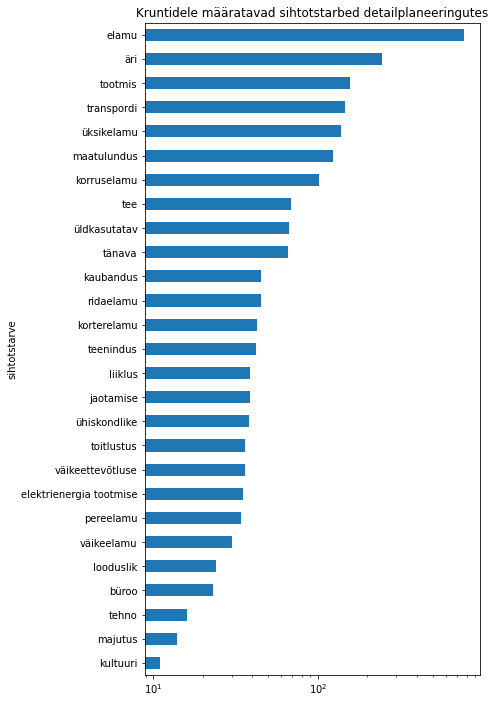

In [130]:
y.sum()[y.sum()>10].sort_values().plot(kind = 'barh', logx= True, figsize=(6,12), title="Kruntidele määratavad sihtotstarbed detailplaneeringutes",xlabel="sihtotstarve",ylabel="kruntide arv")

In [118]:
z2

,büroo,elamu,elektrienergia tootmise,jaotamise,kaubandus,korruselamu,korterelamu,kultuuri,liiklus,looduslik,maatulundus,majutus,pereelamu,ridaelamu,tee,teenindus,tehno,toitlustus,tootmis,transpordi,tänava,väikeelamu,väikeettevõtluse,äri,ühiskondlike,üksikelamu,üldkasutatav
büroo,0,0,0,0,15,0,3,1,0,0,0,9,0,0,0,12,0,12,9,0,0,0,11,2,0,0,0
elamu,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,28,1,0,0
elektrienergia tootmise,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0
jaotamise,0,0,35,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,26,0,0,0,0,0,0,0,0
kaubandus,15,0,0,1,0,0,3,2,0,2,0,7,0,0,1,37,0,34,18,0,1,0,13,2,0,0,0
korruselamu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
korterelamu,3,0,0,0,3,0,0,0,0,0,0,3,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0
kultuuri,1,0,0,0,2,0,0,0,0,0,0,2,0,0,0,2,0,2,0,2,0,0,0,0,0,0,0
liiklus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0
looduslik,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,4,0


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


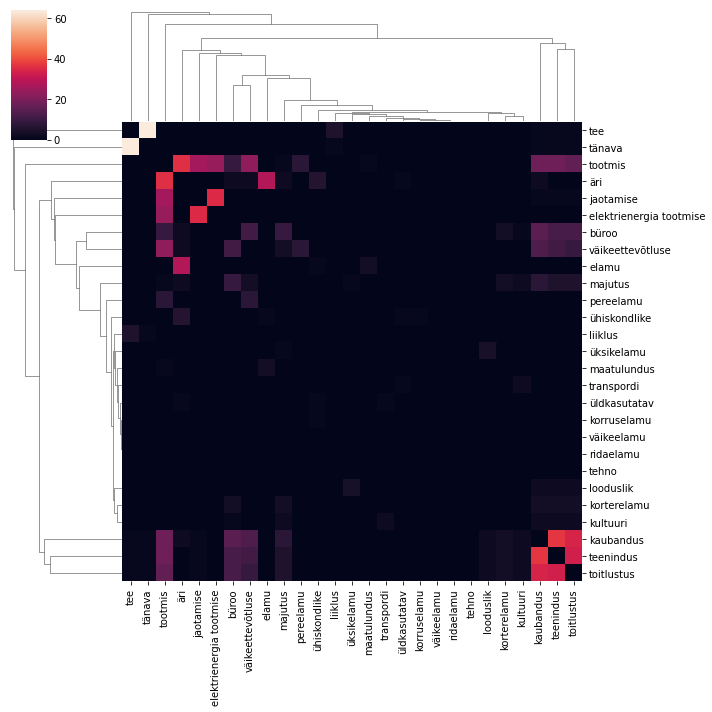

In [117]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

sns.clustermap(z2)

# Show the graph
plt.show()

In [79]:
z2

,büroo,elamu,elektrienergia tootmise,jaotamise,kaubandus,korruselamu,korterelamu,kultuuri,liiklus,looduslik,maatulundus,majutus,pereelamu,ridaelamu,tee,teenindus,tehno,toitlustus,tootmis,transpordi,tänava,väikeelamu,väikeettevõtluse,äri,ühiskondlike,üksikelamu,üldkasutatav
büroo,0,0,0,0,15,0,3,1,0,0,0,9,0,0,0,12,0,12,9,0,0,0,11,2,0,0,0
elamu,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,28,1,0,0
elektrienergia tootmise,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0
jaotamise,0,0,35,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,26,0,0,0,0,0,0,0,0
kaubandus,15,0,0,1,0,0,3,2,0,2,0,7,0,0,1,37,0,34,18,0,1,0,13,2,0,0,0
korruselamu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
korterelamu,3,0,0,0,3,0,0,0,0,0,0,3,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0
kultuuri,1,0,0,0,2,0,0,0,0,0,0,2,0,0,0,2,0,2,0,2,0,0,0,0,0,0,0
liiklus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0
looduslik,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,4,0


In [90]:
y

,büroo,elamu,elektrienergia tootmise,gaasi tootmise,haljasala,haridus,hulgikaubanduse,jaotamise,kaitsehaljastuse,kaitseotstarbelise metsa,kaitseväe,kanalisatsiooni,kaubandus,kontori,konverentsi,korruselamu,korruselmau,korterelamu,kultuuri,lao,lasteasutuste,liiklus,looduslik,looduslik puhkehaljas,maatulundus,majutus,matka,metsa,parkimis,parkmetsa,pereelamu,puhke,põllumajandus,rajada ka laoid,reoveepuhastuse,ridaelamu,riigikaitse,side,soojusenergia tootmise,sotsiaal,sotsiaalhoolekande asutuse,spordiasutuse,supelranna,teadus,tee,teede,teenindus,teenindusasutuste,teenindusettevõtete,teenndus,tehno,tervishoiu,toitlustus,toitustus,toomis,tootmis,tootmis ma,transpordi,trantspordi,turimi,turismi,tänava,veekogude,virgestus,väikeelamu,väikeettevõtluse,väljasõidukoha,äri,ühiselamu,ühiskondlike,üksikelamu,üldkasutatav
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8062,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8064,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


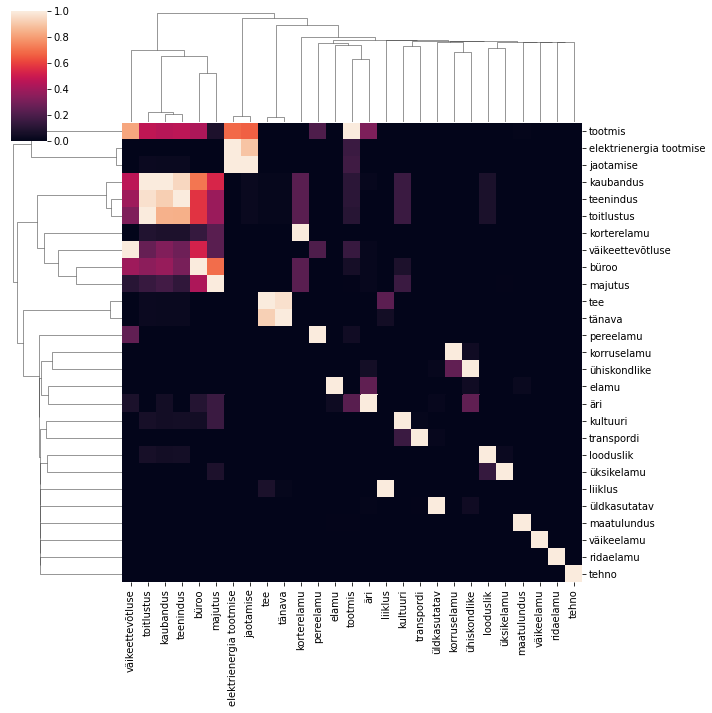

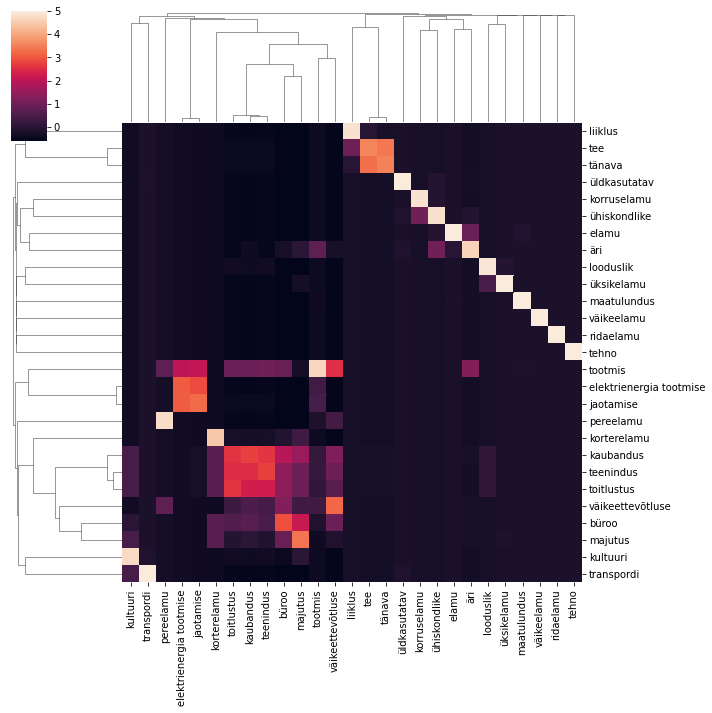

In [80]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
df = normalized_z
 
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(df, standard_scale=1)
plt.show(
)
# Normalize
sns.clustermap(df, z_score=1)
plt.show()

# New section

In [81]:
result_1.groupby('index')['so_u'].count()

index
98         2
1073       7
1180      13
1181       3
1182       4
          ..
103132     1
103133     8
103154     2
103434    11
103573     1
Name: so_u, Length: 1006, dtype: int64

In [82]:
df = pd.merge(df, result_1.groupby('index')['so_u'].count(), left_on='planid', right_on='index')

KeyError: ignored

In [109]:
!pip install bokeh
!apt install bokeh


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package bokeh


In [110]:
!pip install bokeh.charts

ERROR: Could not find a version that satisfies the requirement bokeh.charts (from versions: none)
ERROR: No matching distribution found for bokeh.charts


In [108]:
!apt

apt 1.6.14 (amd64)
Usage: apt [options] command

apt is a commandline package manager and provides commands for
searching and managing as well as querying information about packages.
It provides the same functionality as the specialized APT tools,
like apt-get and apt-cache, but enables options more suitable for
interactive use by default.

Most used commands:
  list - list packages based on package names
  search - search in package descriptions
  show - show package details
  install - install packages
  remove - remove packages
  autoremove - Remove automatically all unused packages
  update - update list of available packages
  upgrade - upgrade the system by installing/upgrading packages
  full-upgrade - upgrade the system by removing/installing/upgrading packages
  edit-sources - edit the source information file

See apt(8) for more information about the available commands.
Configuration options and syntax is detailed in apt.conf(5).
Information about how to configure sources can

In [104]:
from bokeh.charts import output_file, Chord

from bokeh.io import show
from bokeh.sampledata.les_mis import data

nodes = data['nodes']
links = data['links']

nodes_df = pd.DataFrame(nodes)
links_df = pd.DataFrame(links)

source_data = links_df.merge(nodes_df, how='left', left_on='source', right_index=True)
source_data = source_data.merge(nodes_df, how='left', left_on='target', right_index=True)
source_data = source_data[source_data["value"] > 5]

chord_from_df = Chord(source_data, source="name_x", target="name_y", value="value")
output_file('chord_from_df.html', mode="inline")
show(chord_from_df)

ModuleNotFoundError: ignored

In [169]:
result_1.groupby('index')['so_u'].count()

index
98         2
1073       7
1180      13
1181       3
1182       4
          ..
103132     1
103133     8
103154     2
103434    11
103573     1
Name: so_u, Length: 1006, dtype: int64

In [175]:
result_1.groupby('index')['so_u'].count().to_frame().reset_index()

,index,so_u
0,98,2
1,1073,7
2,1180,13
3,1181,3
4,1182,4
...,...,...
1001,103132,1
1002,103133,8
1003,103154,2
1004,103434,11


In [181]:
data['planid']=data['planid'].astype(int)

In [182]:
dff = pd.merge(data, result_1.groupby('index')['so_u'].count().to_frame().reset_index(), left_on='planid', right_on='index')
dff

,id,sys_id,planid,dp_kiht,oid,okood,plannim,planliik,planliik_vaste,planeesm,planseis,planseis_vaste,algatkp,vastuvkp,kehtestkp,planksh,planviide,muutkp,muutnr,seos_ma,arhiiv_digi,avalik,plan_kihid,yp_muutev,allikas,stamp_upd,geometry,area,alg_keh,vas_keh,alg_vas,index,so_u
0,detail_plan_ala.0,116429,90412,DP_plan_ala,1,714.0,Laratsi II detailplaneering,30,Detailplaneering,Detailplaneeringu eesmärgiks on ehitusõiguse m...,10,Planeering on kehtiv,2019-06-28,2020-09-08,2021-01-26,None,https://gis.saaremaavald.ee/failid/DP/DP-19-002/,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((396038.110 6486828.740, 396335.080 6...",77103.657000,578.0,140.0,438.0,90412,2
1,detail_plan_ala.1,116430,88092,DP_plan_ala,18,353.0,"Andineeme külas, Tülivere ühistu 26 ja Tüliver...",10,Maakonnaplaneering; sh osa hõlmav ja teemaplan...,Kahe elamu krundi moodustamine. Maatükid kokku...,10,Planeering on kehtiv,2020-07-02,2020-12-31,2021-02-25,None,https://xgis.maaamet.ee/xgis2/page/app/maainfo,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((582116.026 6595820.950, 582100.958 6...",3184.967490,238.0,56.0,182.0,88092,2
2,detail_plan_ala.2,116431,92752,DP_plan_ala,3,198.0,Ilmandu külas Tarna tee 1 maaüksuse ja lähiala...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on sel...,10,Planeering on kehtiv,2016-12-15,2020-05-28,2021-02-16,None,https://harku.maps.arcgis.com/apps/webappviewe...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((527095.582 6588911.951, 527021.498 6...",27264.116427,1524.0,264.0,1260.0,92752,8
3,detail_plan_ala.3,116432,80372,DP_plan_ala,1,NaN,Meierei tn 36 kinnistu ja lähiala detailplanee...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on kin...,10,Planeering on kehtiv,2019-02-11,2021-02-22,2021-05-24,None,http://atp.amphora.ee/raasikuvv/index.aspx?itm...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((567673.829 6581797.095, 567584.551 6...",16442.520075,833.0,91.0,742.0,80372,6
4,detail_plan_ala.4,116433,95092,DP_plan_ala,7,NaN,Matise detailplaneering,30,Detailplaneering,Elamukruntidele ehitusõiguse määramine ehitusk...,10,Planeering on kehtiv,2020-02-28,2021-02-26,2021-08-27,None,https://www.saaremaavald.ee/detailplaneeringud...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,jah,MA sisestatud,2021-12-10,"POLYGON ((377561.276 6465387.797, 377559.189 6...",64412.235153,546.0,182.0,364.0,95092,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,detail_plan_ala.976,117405,102036,DP_plan_ala,28,NaN,"Kinnistute Sepamäe tee 13, Sepamäe tee 15 ja S...",30,Detailplaneering,Kinnistute jagamine ning ehitusõiguse määramin...,10,Planeering on kehtiv,2020-09-16,2021-06-30,2021-12-15,None,None,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2022-01-10,"POLYGON ((549230.630 6601399.070, 549289.730 6...",6629.156250,455.0,168.0,287.0,102036,8
975,detail_plan_ala.977,117406,101172,DP_plan_ala,10,NaN,Kõrgemaa kinnistu detailplaneering,30,Detailplaneering,Kinnistu jagamine loodusliku maa ja elamumaa k...,10,Planeering on kehtiv,2020-05-27,2021-03-24,2021-10-20,None,None,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2022-01-11,"POLYGON ((547669.350 6597654.390, 547742.660 6...",10290.357050,511.0,210.0,301.0,101172,3
976,detail_plan_ala.978,117407,92034,DP_plan_ala,11,NaN,Kinnistu Tammenu

,id,sys_id,planid,dp_kiht,oid,okood,plannim,planliik,planliik_vaste,planeesm,planseis,planseis_vaste,algatkp,vastuvkp,kehtestkp,planksh,planviide,muutkp,muutnr,seos_ma,arhiiv_digi,avalik,plan_kihid,yp_muutev,allikas,stamp_upd,geometry,area,alg_keh,vas_keh,alg_vas
0,detail_plan_ala.0,116429,90412,DP_plan_ala,1,714.0,Laratsi II detailplaneering,30,Detailplaneering,Detailplaneeringu eesmärgiks on ehitusõiguse m...,10,Planeering on kehtiv,2019-06-28,2020-09-08,2021-01-26,None,https://gis.saaremaavald.ee/failid/DP/DP-19-002/,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((396038.110 6486828.740, 396335.080 6...",77103.657000,578.0,140.0,438.0
1,detail_plan_ala.1,116430,88092,DP_plan_ala,18,353.0,"Andineeme külas, Tülivere ühistu 26 ja Tüliver...",10,Maakonnaplaneering; sh osa hõlmav ja teemaplan...,Kahe elamu krundi moodustamine. Maatükid kokku...,10,Planeering on kehtiv,2020-07-02,2020-12-31,2021-02-25,None,https://xgis.maaamet.ee/xgis2/page/app/maainfo,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((582116.026 6595820.950, 582100.958 6...",3184.967490,238.0,56.0,182.0
2,detail_plan_ala.2,116431,92752,DP_plan_ala,3,198.0,Ilmandu külas Tarna tee 1 maaüksuse ja lähiala...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on sel...,10,Planeering on kehtiv,2016-12-15,2020-05-28,2021-02-16,None,https://harku.maps.arcgis.com/apps/webappviewe...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((527095.582 6588911.951, 527021.498 6...",27264.116427,1524.0,264.0,1260.0
3,detail_plan_ala.3,116432,80372,DP_plan_ala,1,NaN,Meierei tn 36 kinnistu ja lähiala detailplanee...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on kin...,10,Planeering on kehtiv,2019-02-11,2021-02-22,2021-05-24,None,http://atp.amphora.ee/raasikuvv/index.aspx?itm...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((567673.829 6581797.095, 567584.551 6...",16442.520075,833.0,91.0,742.0
4,detail_plan_ala.4,116433,95092,DP_plan_ala,7,NaN,Matise detailplaneering,30,Detailplaneering,Elamukruntidele ehitusõiguse määramine ehitusk...,10,Planeering on kehtiv,2020-02-28,2021-02-26,2021-08-27,None,https://www.saaremaavald.ee/detailplaneeringud...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,jah,MA sisestatud,2021-12-10,"POLYGON ((377561.276 6465387.797, 377559.189 6...",64412.235153,546.0,182.0,364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,detail_plan_ala.976,117405,102036,DP_plan_ala,28,NaN,"Kinnistute Sepamäe tee 13, Sepamäe tee 15 ja S...",30,Detailplaneering,Kinnistute jagamine ning ehitusõiguse määramin...,10,Planeering on kehtiv,2020-09-16,2021-06-30,2021-12-15,None,None,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2022-01-10,"POLYGON ((549230.630 6601399.070, 549289.730 6...",6629.156250,455.0,168.0,287.0
977,detail_plan_ala.977,117406,101172,DP_plan_ala,10,NaN,Kõrgemaa kinnistu detailplaneering,30,Detailplaneering,Kinnistu jagamine loodusliku maa ja elamumaa k...,10,Planeering on kehtiv,2020-05-27,2021-03-24,2021-10-20,None,None,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2022-01-11,"POLYGON ((547669.350 6597654.390, 547742.660 6...",10290.357050,511.0,210.0,301.0
978,detail_plan_ala.978,117407,92034,DP_plan_ala,11,NaN,Kinnistu Tammenurme tee 5 detailplaneering,30,Detailplaneering,Ehitusõiguse määramine kaksike

In [185]:
#categorical data
categorical_cols = ['planksh','yp_muutev']

#import pandas as pd
dff = pd.get_dummies(dff, columns = categorical_cols)

In [186]:
dff

,id,sys_id,planid,dp_kiht,oid,okood,plannim,planliik,planliik_vaste,planeesm,planseis,planseis_vaste,algatkp,vastuvkp,kehtestkp,planviide,muutkp,muutnr,seos_ma,arhiiv_digi,avalik,plan_kihid,allikas,stamp_upd,geometry,area,alg_keh,vas_keh,alg_vas,index,so_u,planksh_,planksh_ei,planksh_jah,yp_muutev_ei,yp_muutev_jah
0,detail_plan_ala.0,116429,90412,DP_plan_ala,1,714.0,Laratsi II detailplaneering,30,Detailplaneering,Detailplaneeringu eesmärgiks on ehitusõiguse m...,10,Planeering on kehtiv,2019-06-28,2020-09-08,2021-01-26,https://gis.saaremaavald.ee/failid/DP/DP-19-002/,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,MA sisestatud,2021-12-10,"POLYGON ((396038.110 6486828.740, 396335.080 6...",77103.657000,578.0,140.0,438.0,90412,2,0,0,0,0,0
1,detail_plan_ala.1,116430,88092,DP_plan_ala,18,353.0,"Andineeme külas, Tülivere ühistu 26 ja Tüliver...",10,Maakonnaplaneering; sh osa hõlmav ja teemaplan...,Kahe elamu krundi moodustamine. Maatükid kokku...,10,Planeering on kehtiv,2020-07-02,2020-12-31,2021-02-25,https://xgis.maaamet.ee/xgis2/page/app/maainfo,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,MA sisestatud,2021-12-10,"POLYGON ((582116.026 6595820.950, 582100.958 6...",3184.967490,238.0,56.0,182.0,88092,2,0,0,0,0,0
2,detail_plan_ala.2,116431,92752,DP_plan_ala,3,198.0,Ilmandu külas Tarna tee 1 maaüksuse ja lähiala...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on sel...,10,Planeering on kehtiv,2016-12-15,2020-05-28,2021-02-16,https://harku.maps.arcgis.com/apps/webappviewe...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,MA sisestatud,2021-12-10,"POLYGON ((527095.582 6588911.951, 527021.498 6...",27264.116427,1524.0,264.0,1260.0,92752,8,0,0,0,0,0
3,detail_plan_ala.3,116432,80372,DP_plan_ala,1,NaN,Meierei tn 36 kinnistu ja lähiala detailplanee...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on kin...,10,Planeering on kehtiv,2019-02-11,2021-02-22,2021-05-24,http://atp.amphora.ee/raasikuvv/index.aspx?itm...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,MA sisestatud,2021-12-10,"POLYGON ((567673.829 6581797.095, 567584.551 6...",16442.520075,833.0,91.0,742.0,80372,6,0,0,0,0,0
4,detail_plan_ala.4,116433,95092,DP_plan_ala,7,NaN,Matise detailplaneering,30,Detailplaneering,Elamukruntidele ehitusõiguse määramine ehitusk...,10,Planeering on kehtiv,2020-02-28,2021-02-26,2021-08-27,https://www.saaremaavald.ee/detailplaneeringud...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,MA sisestatud,2021-12-10,"POLYGON ((377561.276 6465387.797, 377559.189 6...",64412.235153,546.0,182.0,364.0,95092,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,detail_plan_ala.976,117405,102036,DP_plan_ala,28,NaN,"Kinnistute Sepamäe tee 13, Sepamäe tee 15 ja S...",30,Detailplaneering,Kinnistute jagamine ning ehitusõiguse määramin...,10,Planeering on kehtiv,2020-09-16,2021-06-30,2021-12-15,None,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,MA sisestatud,2022-01-10,"POLYGON ((549230.630 6601399.070, 549289.730 6...",6629.156250,455.0,168.0,287.0,102036,8,0,0,0,0,0
975,detail_plan_ala.977,117406,101172,DP_plan_ala,10,NaN,Kõrgemaa kinnistu detailplaneering,30,Detailplaneering,Kinnistu jagamine loodusliku maa ja elamumaa k...,10,Planeering on kehtiv,2020-05-27,2021-03-24,2021-10-20,None,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,MA sisestatud,2022-01-11,"POLYGON ((547669.350 6597654.390, 547742.660 6...",10290.357050,511.0,210.0,301.0,101172,3,0,0,0,0,0
976,detail_plan_al

In [189]:
dff =dff[['alg_keh','vas_keh','alg_vas','planksh_','planksh_ei','planksh_jah','yp_muutev_ei','yp_muutev_jah','area','so_u']].fillna(0)
dff

,alg_keh,vas_keh,alg_vas,planksh_,planksh_ei,planksh_jah,yp_muutev_ei,yp_muutev_jah,area,so_u
0,578.0,140.0,438.0,0,0,0,0,0,77103.657000,2
1,238.0,56.0,182.0,0,0,0,0,0,3184.967490,2
2,1524.0,264.0,1260.0,0,0,0,0,0,27264.116427,8
3,833.0,91.0,742.0,0,0,0,0,0,16442.520075,6
4,546.0,182.0,364.0,0,0,0,0,1,64412.235153,2
...,...,...,...,...,...,...,...,...,...,...
974,455.0,168.0,287.0,0,0,0,0,0,6629.156250,8
975,511.0,210.0,301.0,0,0,0,0,0,10290.357050,3
976,336.0,189.0,147.0,0,0,0,0,0,2048.783900,1
977,1724.0,140.0,1584.0,0,0,0,0,0,154618.388002,114


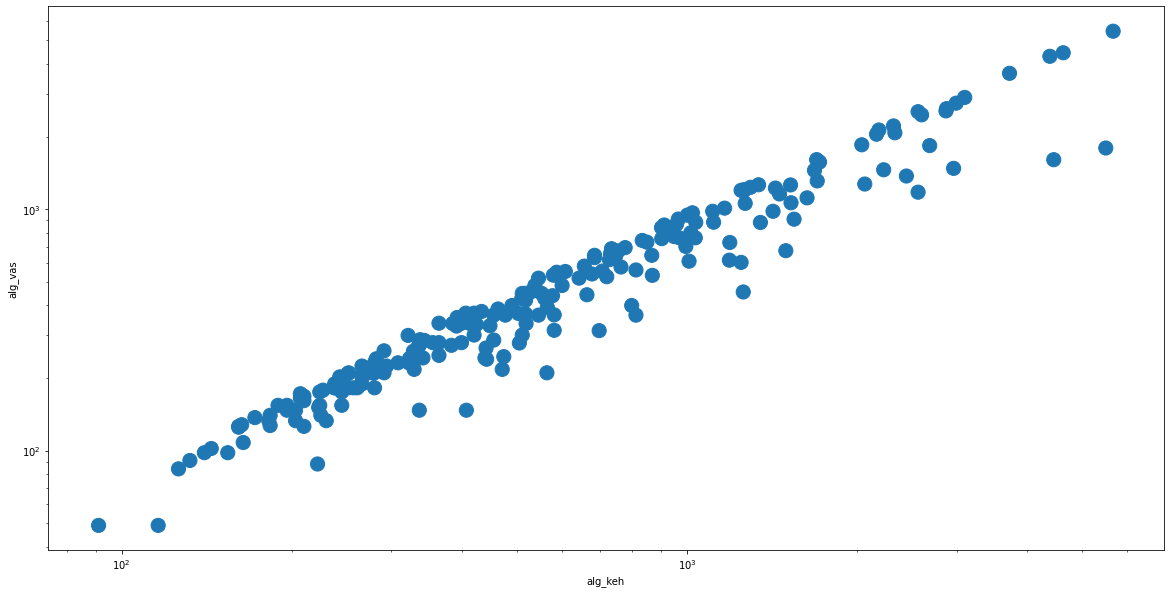

In [217]:
dfp =dff[(dff['alg_keh']<10000) &(dff['alg_vas']>0)&(dff['alg_keh']>0)&(dff['area']<100000)&(dff['alg_vas']<dff['alg_keh'])].fillna(0)
dfp.plot.scatter('alg_keh','alg_vas', s=dfp['area'].clip(0,200),figsize=(20,10),loglog=True)

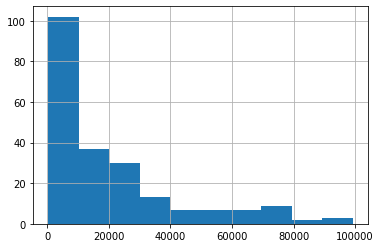

In [210]:
dfp['area'].hist()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f4a3fb0f5f0> (for post_execute):


KeyboardInterrupt: ignored

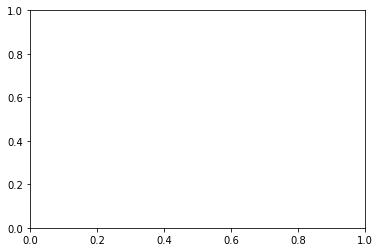

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize=(20, 10))
ax = plt.gca()
scatter = ax.scatter(dfp['vas_keh'],dfp['alg_vas'],s=0.0001*(dfp['alg_keh'].clip(0,100))**2,c=dfp['so_u'], cmap="Spectral")
ax.set_yscale('log')
ax.set_xscale('log')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

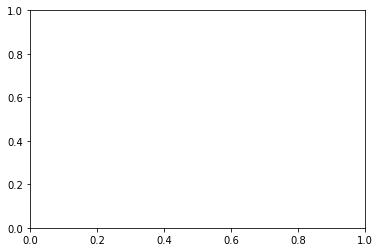

In [227]:
fig, ax = plt.subplots()

In [244]:
dfp.sum()

alg_keh          1.848430e+05
vas_keh          4.134900e+04
alg_vas          1.434940e+05
planksh_         7.000000e+00
planksh_ei       3.000000e+00
planksh_jah      1.000000e+00
yp_muutev_ei     0.000000e+00
yp_muutev_jah    5.000000e+00
area             4.424979e+06
so_u             1.220000e+03
dtype: float64

In [ ]:
*